In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
ppmi_master_dataset = pd.read_csv('CreatingDataset/ppmi_master_dataset.csv')

In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

# Assuming your DataFrame is named ppmi_master_dataset and 'Date' is the column with the timestamps
ppmi_master_dataset['Visit Date'] = pd.to_datetime(ppmi_master_dataset['Visit Date'])
ppmi_master_dataset.set_index('Date', inplace=True)

# Choose a patient
patient_data = ppmi_master_dataset[ppmi_master_dataset['Patient ID'] == 'some_patient_id']

# Choose a medical data column to analyze
data_column = 'some_column_name'

# Define the model
model = ARIMA(patient_data[data_column], order=(5,1,0))

# Fit the model
model_fit = model.fit(disp=0)

# Summary of the model
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Density plot of the residual error values
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Use the model to make predictions
forecast = model_fit.forecast(steps=10)  # forecast the next 10 data points
print(forecast)

In [95]:
ppmi_master_dataset

,Patient ID,Visit Date,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,brightness,contrast,correlation,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy
0,3010,13/07/2011,BL,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.007926,158.463741,0.831520,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468
1,3010,26/06/2012,V04,1.0,2.0,1.0,0.0,2.0,0.0,0.0,...,0.018020,326.583983,0.852982,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167
2,3010,17/07/2013,V06,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.012063,178.744707,0.882104,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722
3,3010,26/06/2015,V10,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.014601,296.968707,0.837949,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195
4,3012,11/10/2011,SC,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.013327,167.855630,0.899377,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,137450,19/03/2024,V06,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,0.018947,720.422511,0.685260,3.253121,0.972526,20.735130,945.195488,0.982511,0.972334,0.133635
908,142004,24/02/2022,BL,1.0,1.0,0.0,2.0,2.0,2.0,1.0,...,0.015122,209.292168,0.890132,1.108192,0.981616,15.682664,664.117954,0.992613,0.986875,0.073646
909,142004,07/11/2022,V02,1.0,2.0,2.0,2.0,3.0,2.0,2.0,...,0.015591,521.905040,0.711337,2.744637,0.972261,15.482913,804.136152,0.979712,0.970353,0.142520
910,142004,03/04/2023,V04,0.0,1.0,1.0,1.0,2.0,1.0,2.0,...,0.017739,190.860029,0.910562,0.914200,0.979811,17.088529,712.152217,0.994828,0.988797,0.063939


In [96]:
print(ppmi_master_dataset.isnull().sum())

Patient ID       0
Visit Date       0
EVENT_ID         8
NP3SPCH          8
NP3FACXP         8
                ..
gabor_energy     4
gabor_entropy    4
homogeneity      4
lbp_energy       4
lbp_entropy      4
Length: 90, dtype: int64


In [97]:
ppmi_master_dataset = ppmi_master_dataset.ffill()

ppmi_master_dataset

,Patient ID,Visit Date,EVENT_ID,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,...,brightness,contrast,correlation,dissimilarity,energy,gabor_energy,gabor_entropy,homogeneity,lbp_energy,lbp_entropy
0,3010,13/07/2011,BL,0.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.007926,158.463741,0.831520,0.816963,0.989929,9.525620,379.868298,0.995363,0.990573,0.054468
1,3010,26/06/2012,V04,1.0,2.0,1.0,0.0,2.0,0.0,0.0,...,0.018020,326.583983,0.852982,1.562270,0.977459,17.621092,781.401212,0.991459,0.983486,0.089167
2,3010,17/07/2013,V06,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.012063,178.744707,0.882104,0.894156,0.985684,13.268292,519.371246,0.994178,0.988597,0.064722
3,3010,26/06/2015,V10,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0.014601,296.968707,0.837949,1.390070,0.982016,16.052184,658.612867,0.992227,0.984798,0.082195
4,3012,11/10/2011,SC,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.013327,167.855630,0.899377,0.768224,0.984650,15.227890,573.424163,0.996028,0.990869,0.053686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,137450,19/03/2024,V06,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,0.018947,720.422511,0.685260,3.253121,0.972526,20.735130,945.195488,0.982511,0.972334,0.133635
908,142004,24/02/2022,BL,1.0,1.0,0.0,2.0,2.0,2.0,1.0,...,0.015122,209.292168,0.890132,1.108192,0.981616,15.682664,664.117954,0.992613,0.986875,0.073646
909,142004,07/11/2022,V02,1.0,2.0,2.0,2.0,3.0,2.0,2.0,...,0.015591,521.905040,0.711337,2.744637,0.972261,15.482913,804.136152,0.979712,0.970353,0.142520
910,142004,03/04/2023,V04,0.0,1.0,1.0,1.0,2.0,1.0,2.0,...,0.017739,190.860029,0.910562,0.914200,0.979811,17.088529,712.152217,0.994828,0.988797,0.063939


In [98]:
ppmi_master_dataset.dtypes

Patient ID         int64
Visit Date        object
EVENT_ID          object
NP3SPCH          float64
NP3FACXP         float64
                  ...   
gabor_energy     float64
gabor_entropy    float64
homogeneity      float64
lbp_energy       float64
lbp_entropy      float64
Length: 90, dtype: object

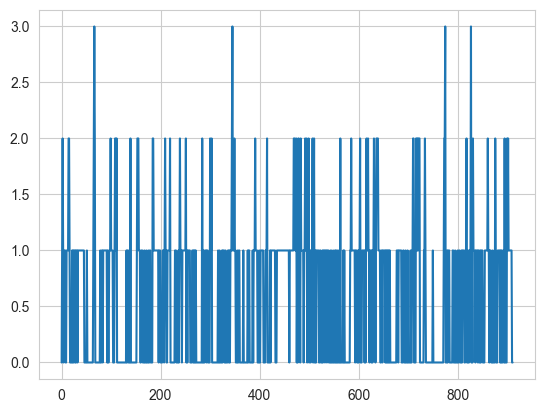

In [108]:
ppmi_master_dataset['NP3SPCH'].plot()
plt.show()

In [99]:
# ppmi_master_dataset_features = ppmi_master_dataset.drop(['Patient ID', 'Visit Date', 'CONCOHORT'], axis=1)

In [100]:
# # Sample Data (You would replace this with loading your actual dataset)
# # ppmi_master_dataset = pd.read_csv('your_dataset.csv')
# 
# # Define the function to analyze features across all events
# def analyze_feature(data, feature):
#     if data[feature].dtype == 'object' or data[feature].dtype.name == 'category':  # Categorical feature
#         feature_counts = data.groupby(['EVENT_ID', feature]).size().unstack().fillna(0)
#         print(feature_counts)
# 
#         # Plot the distribution
#         feature_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
#         plt.title(f'Distribution of {feature} Across All Events')
#         plt.xlabel('EVENT_ID')
#         plt.ylabel('Frequency')
#         plt.xticks(rotation=0)
#         plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()
#     else:  # Continuous feature
#         plt.figure(figsize=(14, 8))
#         sns.boxplot(x='EVENT_ID', y=feature, data=data)
#         plt.title(f'Distribution of {feature} Across All Events')
#         plt.xlabel('EVENT_ID')
#         plt.ylabel(feature)
#         plt.show()
# 
# # Loop through all features
# for feature in ppmi_master_dataset.columns:
#     if feature != 'EVENT_ID':  # Skip the 'EVENT_ID' column itself
#         analyze_feature(ppmi_master_dataset, feature)


In [101]:
# plt.figure(figsize=(90,90))
# 
# sns.heatmap(ppmi_master_dataset_features.corr(), annot=True, fmt="1.1f")
# plt.show()

In [102]:
# ppmi_master_dataset['Patient ID'].nunique()

In [103]:
# ppmi_master_dataset.columns

In [104]:
# Group by 'Patient ID', 'Date' and 'Event_ID'
# ppmi_master_dataset_grouped = ppmi_master_dataset.groupby(['Patient ID', 'Visit Date', 'EVENT_ID'])

In [105]:
# plt.figure(figsize=(10,10))
# 
# sns.heatmap(ppmi_master_dataset_grouped.corr(), annot=True, fmt="1.1f")